In [ ]:
from ucimlrepo import fetch_ucirepo
 
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 

# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

# metadata 
#print(bank_marketing.metadata) 

# variable information 
#print(bank_marketing.variables) 
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


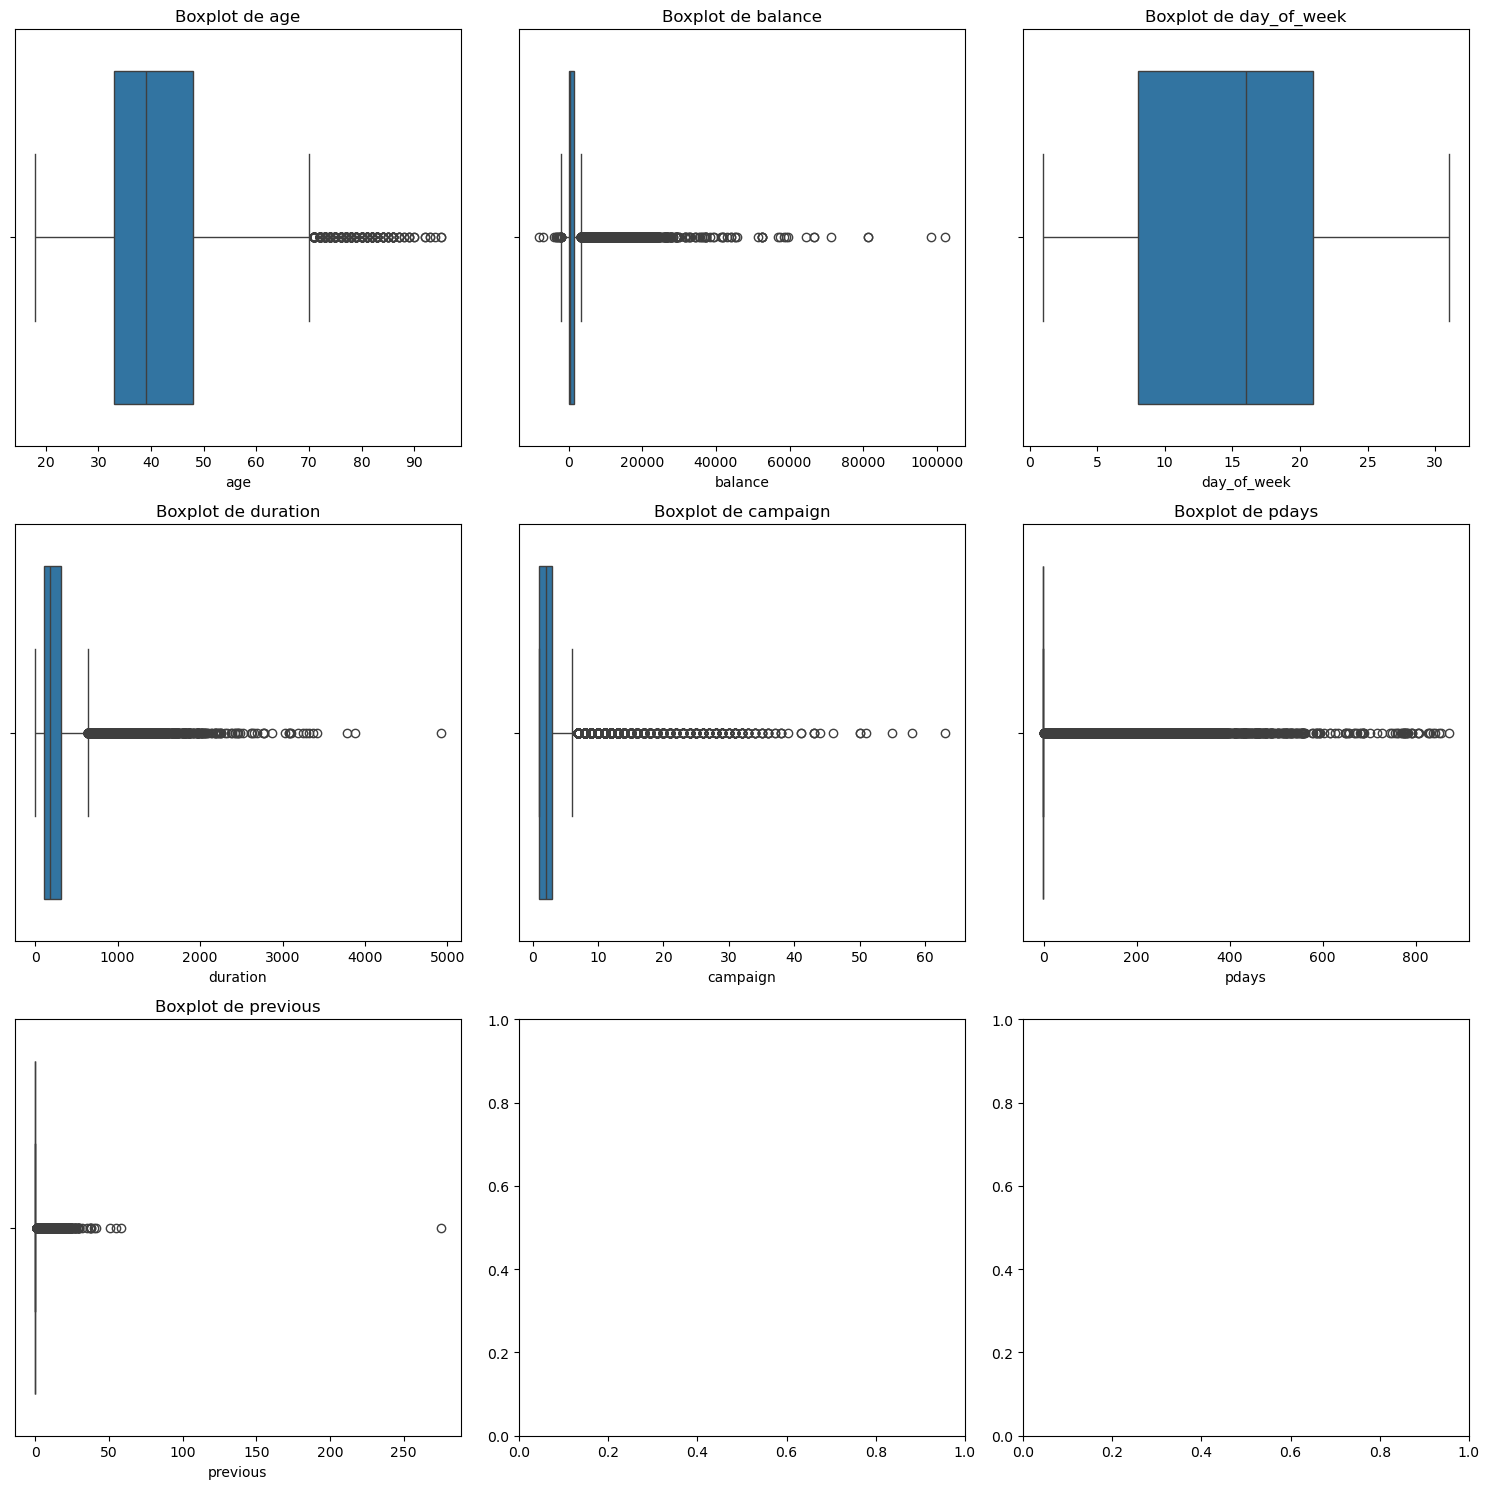

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grafico_outliers(numeric_features):
    # Seleccionar las características numéricas
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

    for i, col in enumerate(numeric_features, 1):
        plt.subplot(3, 3, i)  # Ajusta el número de subplots según el número de características
        sns.boxplot(x=X[col])
        plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
plot_grafico_outliers(numeric_features)





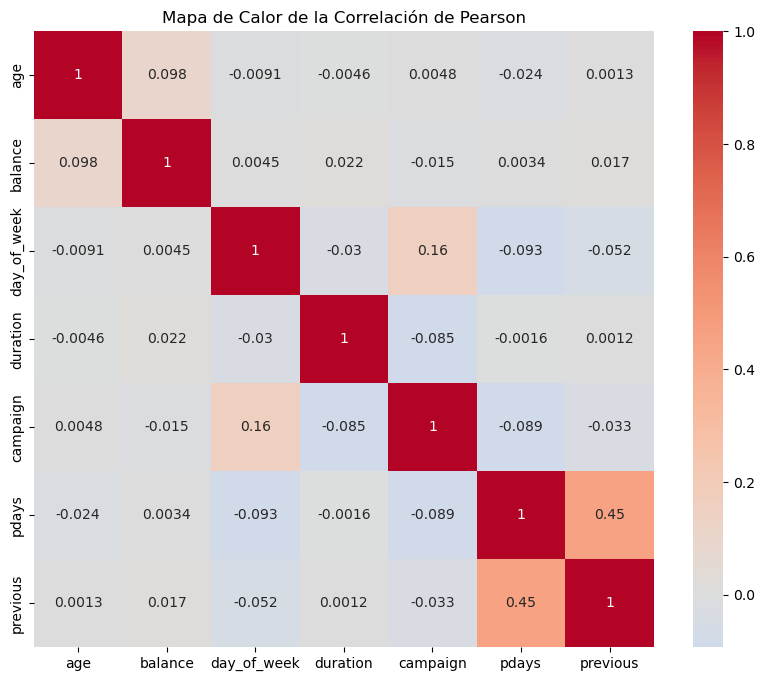

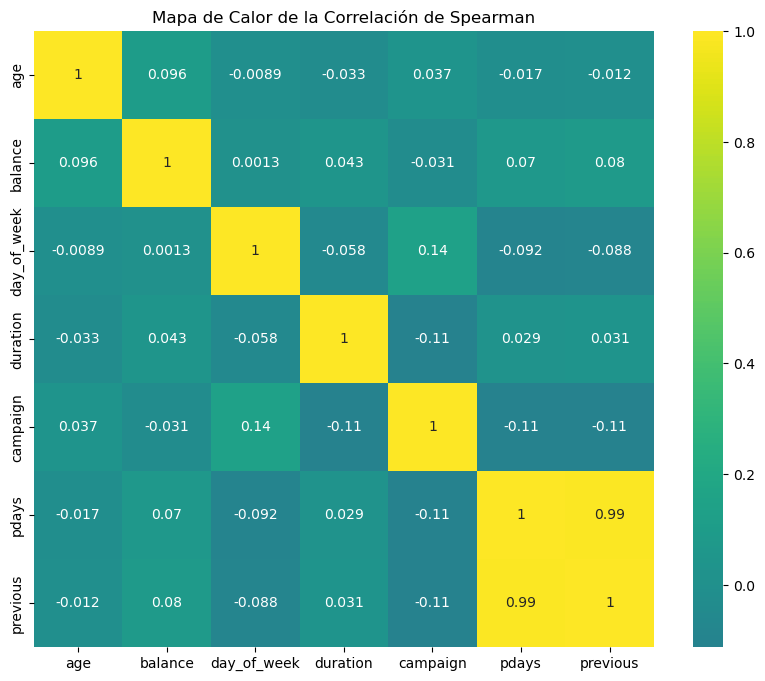

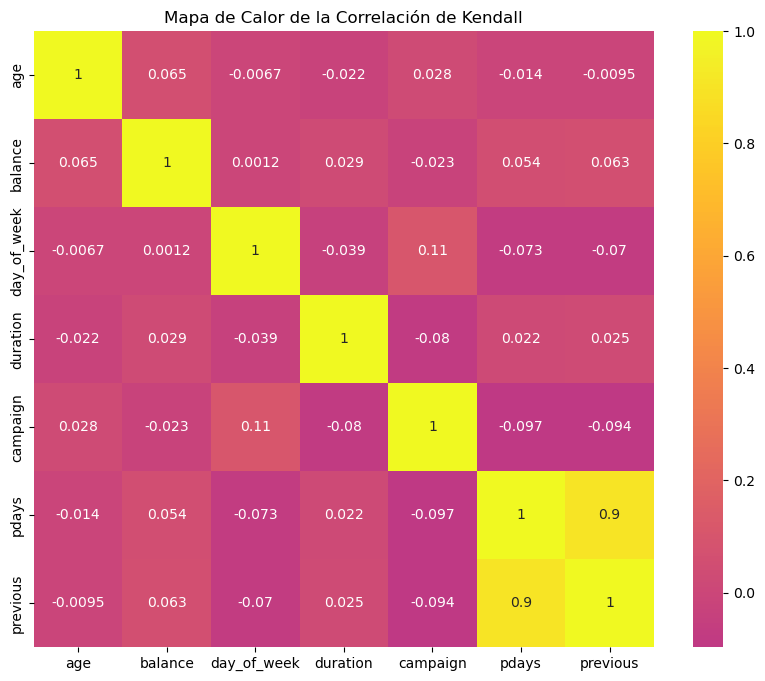

In [16]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular las correlaciones
correlation_matrix = numeric_df.corr(method='pearson')
spearman_corr = numeric_df.corr(method='spearman')
kendall_corr = numeric_df.corr(method='kendall')

# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  target       45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
import pandas as pd 
#Identificar valores faltantes
def identificar_valores_faltantes(df):
    print("Valores faltantes en el dataset")
    qsna = df.shape[0] - df.isnull().sum(axis=0)
    qna = df.isnull().sum(axis=0)
    ppna = round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)
    
    # Crear DataFrame con los resultados
    aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
    na_df = pd.DataFrame(data=aux)
    
    # Ordenar el DataFrame por el porcentaje de valores faltantes
    return na_df.sort_values(by='Na en %', ascending=False)

# Rellenar valores faltantes
def rellenar_valores_faltantes(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:  # Procesar solo columnas con valores faltantes
            if df[column].dtype == 'object':  # Si la columna es de tipo texto
                df[column].fillna('Desconocido', inplace=True)  # Rellenar con 'Desconocido'
            elif df[column].dtype in ['int64', 'float64']:  # Si la columna es numérica
                moda = df[column].mode()[0]  # Obtener la moda (valor más frecuente)
                df[column].fillna(moda, inplace=True)  # Rellenar con la moda
    return df

# Identificar valores faltantes
print("Valores faltantes en el dataset antes de la limpieza")
na_df = identificar_valores_faltantes(df)
print(na_df)
# Rellenar valores faltantes
df = rellenar_valores_faltantes(df)
print(df.head())
## Verificar valores luego de la modificacion
print("Valores faltantes en el dataset despues de la limpieza")
na_df = identificar_valores_faltantes(df)
print(na_df)

Valores faltantes en el dataset antes de la limpieza
Valores faltantes en el dataset
             datos sin NAs en q  Na en q  Na en %
poutcome                   8252    36959    81.75
contact                   32191    13020    28.80
education                 43354     1857     4.11
job                       44923      288     0.64
month                     45211        0     0.00
previous                  45211        0     0.00
pdays                     45211        0     0.00
campaign                  45211        0     0.00
duration                  45211        0     0.00
age                       45211        0     0.00
day_of_week               45211        0     0.00
loan                      45211        0     0.00
housing                   45211        0     0.00
balance                   45211        0     0.00
default                   45211        0     0.00
marital                   45211        0     0.00
target                    45211        0     0.00
   age         

C:\Users\ENRIF\AppData\Local\Temp\ipykernel_24292\2102804338.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('Desconocido', inplace=True)  # Rellenar con 'Desconocido'


C:\Users\ENRIF\AppData\Local\Temp\ipykernel_24292\18367395.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '40.93621021432837' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_modificado.loc[outlier_indices, col] = mean_value
C:\Users\ENRIF\AppData\Local\Temp\ipykernel_24292\18367395.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1362.2720576850766' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_modificado.loc[outlier_indices, col] = mean_value
C:\Users\ENRIF\AppData\Local\Temp\ipykernel_24292\18367395.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '258.1630797814691' has dtype incompatible with int64, please explicitly cast to a compatible

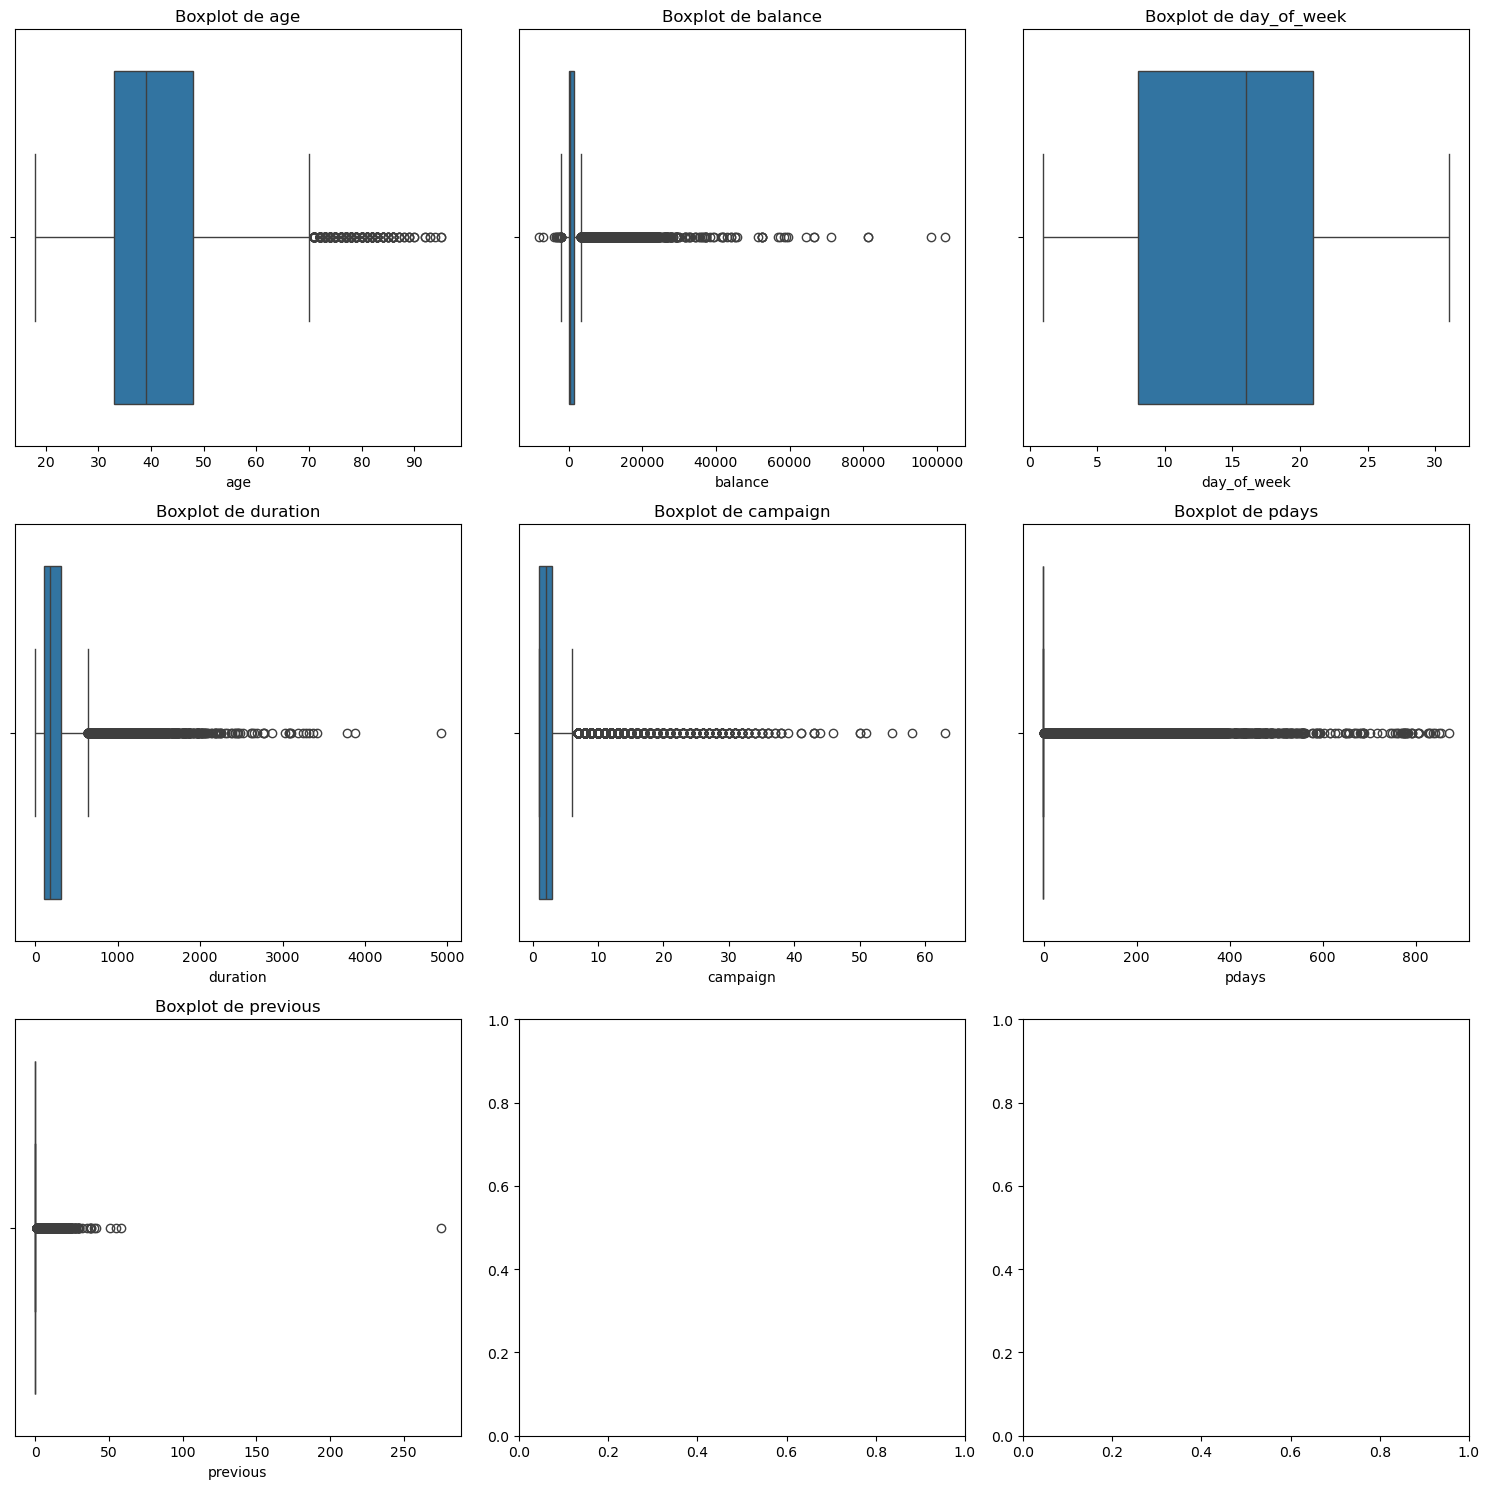

In [31]:
##Deteccion de datos anomalos con verificacion IQR para deteccion de datos outliers
### Deteccion de outliers de acuerdo a articulo: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

## Se tienen en cuenta solo los features relevantes, los cuales seran modificados de acuerdo a la media 
def modificar_outliers_iqr(features):
    # Crear una copia del DataFrame original
    df_modificado = df.copy()##Creacion de copia del dataframe para realizar la modificacion sin afectar el dataframe 
    
    for col in features:
        # Calcular el primer y tercer cuartil
        Q1 = df_modificado[col].quantile(0.25)  # Primer cuartil
        Q3 = df_modificado[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartil

        # Límites inferior y superior para considerar outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar índices de outliers
        outlier_indices = df_modificado[(df_modificado[col] < lower_bound) | (df_modificado[col] > upper_bound)].index
        
        # Calcular la media de la columna
        mean_value = df_modificado[col].mean()
        
        # Reemplazar los outliers por la media
        mean_value = df_modificado[col].mean()
        df_modificado.loc[outlier_indices, col] = mean_value
    
    
    return df_modificado

# Aplicacion del detector
outliers_detectados = modificar_outliers_iqr(numeric_features)

outliers_detectados ## imprime dataset modificado
numeric_features_out_mod = outliers_detectados.select_dtypes(include=['float64', 'int64']).columns
plot_grafico_outliers(numeric_features_out_mod)